In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline

### Zones (geospatial join)

Download shape files and store in data\raw\
- https://datos.crtm.es/datasets/zonificacionzt1259
https://datos.crtm.es/datasets/zonificacionzt84

In [2]:
zt1259 = gpd.read_file(r'..\data\raw\zt1259\ZonificacionZT1259.shp') 
zt84 = gpd.read_file(r'..\data\raw\zt84\ZonificacionZT84.shp') 

In [3]:
zt84["category"] = zt84.CD_ZT84.round(decimals = -4)

# assign zones to category
zt84.loc[zt84.CD_ZT84 <= 7907, "category"] = "Almendra"
zt84.loc[zt84.category == 10000, "category"] = "Periferia"
zt84.loc[zt84.category == 30000, "category"] = "Metropolitana"
zt84.loc[zt84.category == 100000, "category"] = "Corona Regional"
zt84.loc[zt84.CD_ZT84 == 28013, "category"] = "Corona Regional"

<AxesSubplot:>

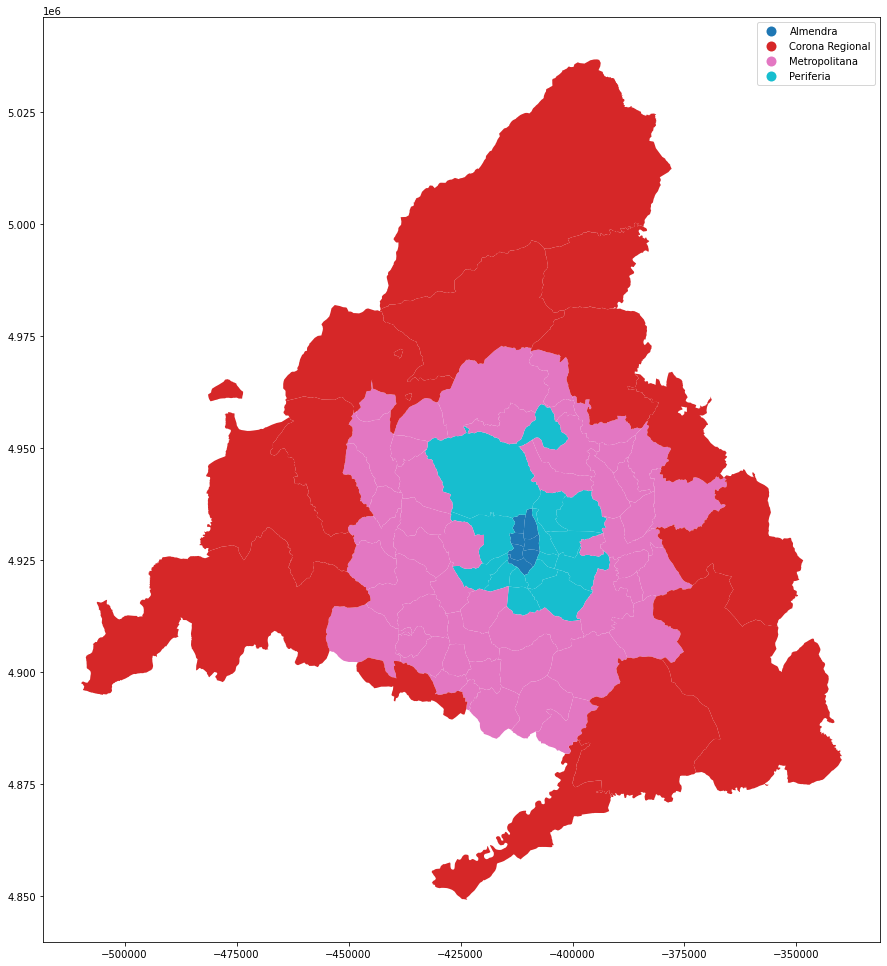

In [4]:
zt84.plot(column = "category", figsize = (15, 20), legend = True)

<AxesSubplot:>

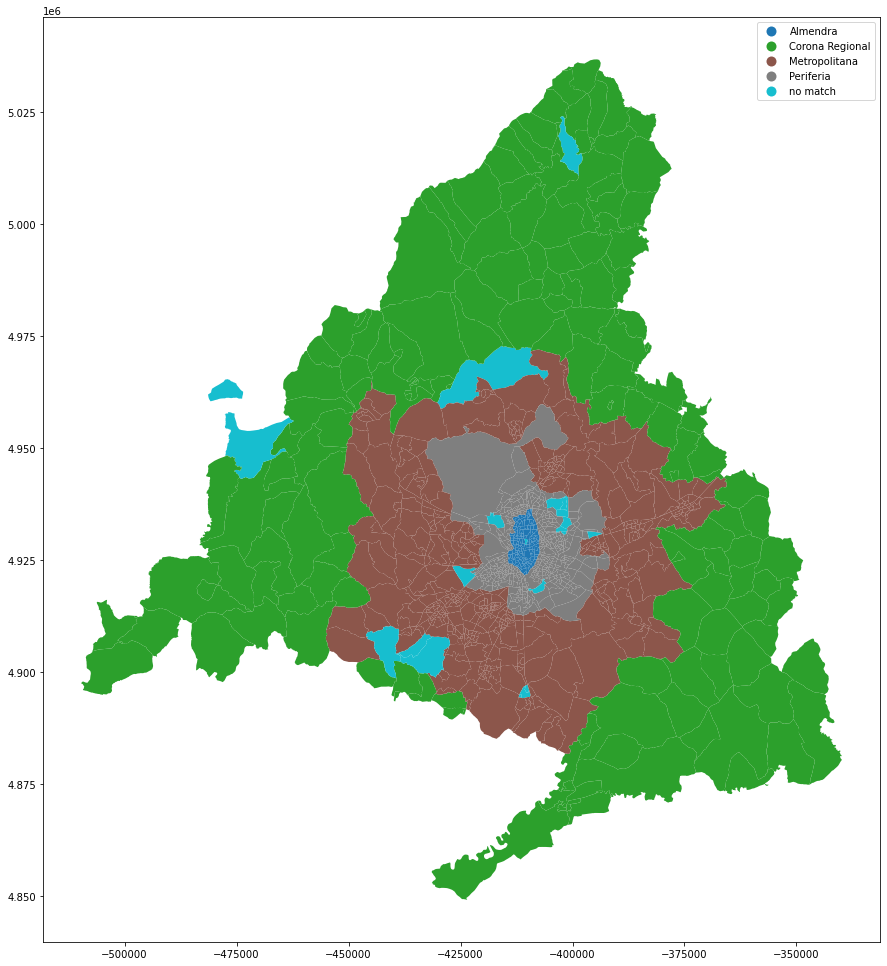

In [5]:
# geospatial join of zt84 and zt1259
# TODO: match missing IDS (unprecise outlines of zones. Either use sth like "snap" or take intersection with largest area)
zones_merged = gpd.sjoin(zt84, zt1259, how="right", op='contains')
zones_merged.category.fillna("no match", inplace = True)
zones_merged.plot(column = 'category', figsize = (15, 20), legend = True)

### Join data to geodata

In [6]:
df = pd.read_csv(r'..\data\interim\legs.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str})

In [7]:
gdf = zones_merged.set_index("ZT1259")[["category", "geometry"]].join(
    df.reset_index().set_index("ZT1259"), how = 'right')

In [8]:
gdf.head()

,category,geometry,index,ID_HOGAR,ID_IND,ID_VIAJE,CODMUNI,NOMMUNI,CODPROV,NOMPROV,...,ESUBIDA_cod,EBAJADA,EBAJADA_cod,ETITULO,EESTACIONA,EOCUPACION,ETDESPH,TIPO_ENCUESTA_etap,COD_MUN_PARADA,ELE_G_POND_Esc2
ZT1259,,,,,,,,,,,,,,,,,,,,,
001-001,Corona Regional,"POLYGON ((-405387.065 5030072.710, -405288.796...",265502,6002887,1,1.0,1,LA ACEBEDA,28,MADRID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATI,NaN,39.649731
001-001,Corona Regional,"POLYGON ((-405387.065 5030072.710, -405288.796...",265503,6002887,1,2.0,1,LA ACEBEDA,28,MADRID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATI,NaN,39.649731
001-001,Corona Regional,"POLYGON ((-405387.065 5030072.710, -405288.796...",265509,6002904,1,1.0,1,LA ACEBEDA,28,MADRID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATI,NaN,21.092377
001-001,Corona Regional,"POLYGON ((-405387.065 5030072.710, -405288.796...",265510,6002904,1,2.0,1,LA ACEBEDA,28,MADRID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CATI,NaN,21.092377
002-002,Metropolitana,"POLYGON ((-387713.843 4947300.398, -387746.632...",0,189,1,1.0,2,AJALVIR,28,MADRID,...,NaN,NaN,NaN,NaN,1.0,1.0,3.0,CAPI,NaN,66.304668


In [ ]:
# gdf.to_csv(r'..\data\processed\legs_georeferenced.csv', index = False)

In [16]:
gdf[["category"]].reset_index().drop_duplicates().to_csv(r'..\data\interim\match_zt1259_to_category.csv', index = False)